<a href="https://colab.research.google.com/github/shahnawazsyed/MAT422/blob/main/HW14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1.4 Principal Component Analysis**
*   1.4.1: Singular value decomposition
*   1.4.2: Low-rank matrix approximations
*   1.4.3: Principal component analysis



In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [38]:
def isSymmetric(A): #check if matrix is symmetric
  return np.allclose(A, np.transpose(A))

In [ ]:
def SVD(A): #used as helper method in 1.4.2
  eigenvalues = np.linalg.eig(np.transpose(A)@A)
  eigenvectors = eigenvalues[1]
  eigenvalues = eigenvalues[0]
  SV = np.sqrt(eigenvalues)
  SV = np.sort(SV)[::-1]
  sigma = np.diag(SV, 0)
  V = (eigenvectors[:, np.argsort(eigenvalues)[::-1]])
  U = (A @ V) @ np.linalg.inv(sigma)
  return U, sigma, V #NOTE: V is returned NOT already transposed

# **1.4.1 Singular Value Decomposition**

In [ ]:
A = np.random.randint(10, size=(3,3))
print(A)

[[8 5 6]
 [3 3 9]
 [1 7 2]]


The singular values (σ<sub>1</sub>...σ<sub>n</sub>) of *A* are the square roots of the eigenvalues of *A*<sup>T</sup>*A*:

In [ ]:
eigenvalues = np.linalg.eig(np.transpose(A)@A)
eigenvectors = eigenvalues[1]
eigenvalues = eigenvalues[0]
print("Eigenvalues: ", (eigenvalues))

Eigenvalues:  [243.93792934  20.05584078   4.00622987]


In [ ]:
SV = np.sqrt(eigenvalues)
SV = np.sort(SV)[::-1]
print("Singular values: ", SV)

Singular values:  [15.61851239  4.47837479  2.00155686]


Let *A* be an *m* x *n* matrix with the dimension of Col(*A*) = *r*. There then exists an *m* x *n* matrix Σ, where the diagonal entries are the first *r* singular values of *A*, arranged in decreasing order. Additionally, there exists an *m* x *m* orthogonal matrix *U* and an *n* x *n* orthogonal matrix V where:

A = UΣV<sup>T</sup>

This is the Singular Value Decomposition (SVD) of *A*. Using the singular values obtained before, we can construct the matrix Σ:

In [ ]:
sigma = np.diag(SV, 0)
print(sigma)

[[15.61851239  0.          0.        ]
 [ 0.          4.47837479  0.        ]
 [ 0.          0.          2.00155686]]


The matrix V has columns corresponding to the normalized eigenvectors of *A*<sup>T</sup>*A*:

In [ ]:
V = (eigenvectors[:, np.argsort(eigenvalues)[::-1]])
print(V)

[[ 0.46873299  0.87465264 -0.12358052]
 [ 0.35021045 -0.31244377 -0.88302408]
 [ 0.81095131 -0.37062333  0.45276519]]


Finally, we form the matrix U, by re-arranging the SVD equation and evaluating AV/Σ

In [ ]:
U = (A @ V) @ np.linalg.inv(sigma)
print(U)

[[ 0.36396881 -0.37101207  0.85432825]
 [ 0.72273885  0.69107731 -0.00779136]
 [ 0.58751618 -0.62029203 -0.51967542]]


We verify the condition of SVD: A = UΣV<sup>T</sup>

In [ ]:
print(np.allclose(A, U@sigma@V.transpose(), atol=1e-8))

True


# **1.4.2 Low-Rank Matrix Approximations**

Suppose we wish to approximate a matrix *A* with a rank-*k* matrix $\hat{A}$, for a target rank *k*.

For computing applications, this is desirable as a compressed version of *A*. For example, it can greatly reduce the amount of parameters, and thus improve performance, in a machine learning model.

We can use the SVD to compute our approximation. The SVD expresses *A* as a sum of rank-1 matricies.

If we want a rank-*k* matrix, we need:

U<sub>k</sub>, the first *k* columns of U.

V<sub>k</sub><sup>T</sup>, the first *k* rows of V<sup>T</sup>.

Σ<sub>k</sub>, the first *k* rows and columns of Σ.

This forms a rank-*k* approximation of $\hat{A}$ = U<sub>k</sub>Σ<sub>k</sub>V<sub>k</sub><sup>T</sup>.

In [ ]:
A = np.random.randint(50, size=(5,5))
print("A:")
print(A)
k = np.random.randint(1, A.shape[1])
print("Approximate A with a rank-k matrix where k =", k)

A:
[[ 1  9 40 49 35]
 [46 15 48 48 48]
 [29 14 16 31 10]
 [ 9 45 37 40  2]
 [15 22  2 19 38]]
Approximate A with a rank-k matrix where k = 3


In [ ]:
U, Sigma, V = SVD(A)
U_k = U[:, :k]
V_kT = np.transpose(V)[:k, :]
sigma_K = Sigma[:k, :k]
print("U_k:")
print(U_k)
print("V_kT:")
print(V_kT)
print("Sigma_k:")
print(sigma_K)

U_k:
[[-0.47187287  0.02164685  0.8197576 ]
 [-0.65168227 -0.42450945 -0.13316381]
 [-0.31250801  0.01593298 -0.42608199]
 [-0.4179271   0.84513671 -0.19517292]
 [-0.28341117 -0.32374869 -0.30104243]]
V_kT:
[[-0.33150812 -0.3030094  -0.49655881 -0.60123519 -0.43615737]
 [-0.36434289  0.55810456  0.25417458  0.19750079 -0.67243012]
 [-0.73690657 -0.49232616  0.3620022   0.21678281  0.19116295]]
Sigma_k:
[[143.35848109   0.           0.        ]
 [  0.          44.72087139   0.        ]
 [  0.           0.          32.47948805]]


In [ ]:
#compute A_hat using formula
A_hat = U_k@sigma_K@V_kT
print(A_hat)

[[ 2.45245099  7.92961695 43.47518055 46.63484648 33.94354378]
 [41.07490702 19.84246267 39.99954716 51.48285947 52.6865522 ]
 [24.79017416 20.78595979 17.41755633 24.07642686 16.41552291]
 [10.76268299 42.36893643 37.06234191 42.11242188 -0.49480031]
 [25.9493032   9.04448974 12.95531196 19.4487038  25.58733629]]


We can evaluate the validity of our approximation by way of the Frobenius norm. We apply the ℓ<sub>2</sub> norm to ||*A* - $\hat{A}$||:

In [ ]:
print("Difference between A and approximation:", np.linalg.norm(A - A_hat, 'fro')) #calculate frobenius norm

Difference between A and approximation: 30.091068728644988


Naturally, a lower rank will result in a more compressed, and thus more efficient, $\hat{A}$. But does this come at the cost of accuracy? We can investigate:

In [ ]:
def computeLowRank(A, k):
  U, Sigma, V = SVD(A)
  U_k = U[:, :k]
  V_kT = np.transpose(V)[:k, :]
  sigma_K = Sigma[:k, :k]
  A_hat = U_k@sigma_K@V_kT
  return np.linalg.norm(A - A_hat, 'fro') #calculate frobenius norm

for k in range(1, A.shape[1]+1): #calculate the accuracy of approximation for each rank from 1 to 10
  print(f"Frobenius norm (error) of rank {k} approximation of A:", computeLowRank(A, k))

Frobenius norm (error) of rank 1 approximation of A: 62.931279175632014
Frobenius norm (error) of rank 2 approximation of A: 44.27628666910379
Frobenius norm (error) of rank 3 approximation of A: 30.091068728644988
Frobenius norm (error) of rank 4 approximation of A: 11.182592260205732
Frobenius norm (error) of rank 5 approximation of A: 7.84534212228327e-14


As shown, the error has an inverse relationship with rank. We can investigate further with a larger matrix, allowing for us to try more ranks and graph the results:

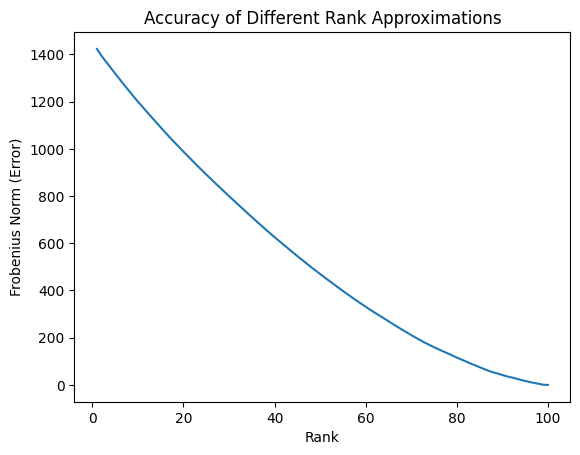

In [ ]:
A = np.random.randint(50, size=(100,100)) #100 x 100 matrix
x_vals = []
y_vals = []
for k in range(1, A.shape[1]+1):
  x_vals.append(k)
  y_vals.append(computeLowRank(A, k))
plt.plot(x_vals, y_vals)
plt.xlabel("Rank")
plt.ylabel("Frobenius Norm (Error)")
plt.title("Accuracy of Different Rank Approximations")
plt.show()

# **1.4.3 Principal Component Analysis**

Let *A* be an *n* by *m* matrix, representing a dataset.

In [45]:
n = np.random.randint(3, 15)
m = np.random.randint(3, 15)
A = np.random.randint(10, size=(m,n))
print(A)

[[8 9 3 7 9 1 3 5 0 1 2]
 [4 2 5 6 7 1 0 8 2 5 5]
 [7 7 9 4 6 4 8 3 3 6 0]
 [0 0 2 9 4 2 7 6 3 5 1]
 [3 9 3 6 8 6 8 0 3 6 7]
 [9 9 8 9 7 7 9 9 7 8 4]
 [8 6 0 4 5 3 5 0 9 0 0]]


Suppose we wish to compute the mean of this dataset and store it in a single vector $\overrightarrow{μ}$:

$\overrightarrow{μ}$ = $\frac{1}{n}(\overrightarrow{x}_1+...+\overrightarrow{x}_n)$

where $\overrightarrow{x}_1...\overrightarrow{x}_n$ represent the columns of *A*.


In [46]:
u = np.round(np.mean(A, axis=0), 2)
print(u)

[5.57 6.   4.29 6.43 6.57 3.43 5.71 4.43 3.86 4.43 2.71]


In order to guarantee a mean of 0 (centering our data), we perform the following calculation, resulting in a new matrix *B*:

*B* = [$\overrightarrow{x}_1-\overrightarrow{μ}|...|\overrightarrow{x}_n-\overrightarrow{μ}]$


In [47]:
B = A - u
print(B)
print("New mean: ", np.round(np.mean(B, axis=0), 2))

[[ 2.43  3.   -1.29  0.57  2.43 -2.43 -2.71  0.57 -3.86 -3.43 -0.71]
 [-1.57 -4.    0.71 -0.43  0.43 -2.43 -5.71  3.57 -1.86  0.57  2.29]
 [ 1.43  1.    4.71 -2.43 -0.57  0.57  2.29 -1.43 -0.86  1.57 -2.71]
 [-5.57 -6.   -2.29  2.57 -2.57 -1.43  1.29  1.57 -0.86  0.57 -1.71]
 [-2.57  3.   -1.29 -0.43  1.43  2.57  2.29 -4.43 -0.86  1.57  4.29]
 [ 3.43  3.    3.71  2.57  0.43  3.57  3.29  4.57  3.14  3.57  1.29]
 [ 2.43  0.   -4.29 -2.43 -1.57 -0.43 -0.71 -4.43  5.14 -4.43 -2.71]]
New mean:  [ 0.  0. -0. -0.  0. -0.  0. -0. -0. -0.  0.]


From this, we can define a covariance matrix *S*, which will be used to examine the variance of our data.

*S* = $\frac{1}{n-1}$*BB*<sup>*T*</sup>

*S* will be a symmetric matrix (*m* x *m*).

In [48]:
S = (1/(n-1))*(B@np.transpose(B))
print(S)
print(isSymmetric(S))

[[ 6.35413  1.10813 -1.09187 -2.99087 -1.24387 -2.52087  0.39613]
 [ 1.10813  7.96213 -2.53787  2.86313 -3.08987 -2.76687 -3.54987]
 [-1.09187 -2.53787  4.96213 -2.33687 -0.18987  2.13313 -0.94987]
 [-2.99087  2.86313 -2.33687  9.56413 -1.88887 -3.66587 -1.54887]
 [-1.24387 -3.08987 -0.18987 -1.88887  7.25813 -0.01887 -0.80187]
 [-2.52087 -2.76687  2.13313 -3.66587 -0.01887 11.00413 -4.17887]
 [ 0.39613 -3.54987 -0.94987 -1.54887 -0.80187 -4.17887 10.63813]]
True


If we wish to know the variance of the first variable of our dataset, represented by the first row of A, we locate the 1,1 entry of S. For the covariance, between 1st and 2nd variables, we locate the 2,1 entry of S. In general:

For 1≤i,j≤m:

*S<sub>ii</sub>* = var(*i*)

*S<sub>ij</sub>* = cov(*i*, *j*), where *i* $\neq$ *j*

where *i* and *j* represent the *i*th and *j*th variables of the dataset.

In [49]:
var = S[0,0]
print("Variance of 1st variable: ", var)
cov = S[1,0]
print("Covariance between 1st and 2nd variables: ", cov)

Variance of 1st variable:  6.35413
Covariance between 1st and 2nd variables:  1.1081299999999998


The total variance of the dataset is the sum of the values along *S*'s diagonal.

In [50]:
totalVariance = np.sum(np.diag(S))
print("Total variance: ", totalVariance)

Total variance:  57.74291000000001
